In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
data=pd.read_csv('DataET0.csv',delimiter=';')

# **Data Preprocessing**
- Exploring Features Data Values and Data Types
- Finding Null Values
- Fill Missing Values
- Data Normalization

### **Exploring Features Data Values and Data Types**

In [199]:
data.dtypes

Date/heure                     object
moy_Temp[°C]                   object
max_Temp[°C]                   object
min_Temp[°C]                   object
moy_DewPoint[°C]               object
min_DewPoint[°C]               object
moy_SolarRadiation[W/m2]        int64
moy_VPD[kPa]                   object
min_VPD[kPa]                   object
moy_RelativeHumidity[%]        object
max_RelativeHumidity[%]        object
min_RelativeHumidity[%]        object
Somme_Precipitation[mm]        object
moy_WindSpeed[m/s]             object
max_WindSpeed[m/s]             object
max_WindSpeedMax[m/s]          object
moy_WindDirection[deg]        float64
dernier_WindDirection[deg]    float64
ETP quotidien [mm]             object
dtype: object

It is strange is to see our feature are numerical and should have numeric data type either int or float. But these features has object as ata type which refers to text type of data. We need to convert them into numerical data types.

### **Checking Unique Values in the Data Feature**

In [200]:
feat_with_object_dtype=data.select_dtypes(np.object).columns
for feature in feat_with_object_dtype:
    print(f'{feature} : {data[feature].unique()}')

Date/heure : ['05/08/2022 00:00' '04/08/2022 00:00' '03/08/2022 00:00' ...
 '05/06/2017 00:00' '10/04/2017 00:00' '10/11/2016 00:00']
moy_Temp[°C] : ['24,73' '25,26' '28,37' ... '29,31' '26,83' '26,19']
max_Temp[°C] : ['35,08' '35,79' '36,71' ... '47,34' '26,47' '22,6']
min_Temp[°C] : ['15,11' '16,4' '19,8' ... '26,1' '22,89' '20,94']
moy_DewPoint[°C] : ['12,4' '14,6' '12,3' '0,9' '8,7' '9,5' '16,5' '12,6' '13,6' '7,9' '4,9'
 '7,2' '5,1' '6,6' '7,3' '9,7' '12,7' '16,9' '18,8' '11,6' '9,4' '2,1'
 '9,2' '4,7' '5,8' '13,1' '15,6' '16,6' '15,9' '12,5' '11,8' '12' '9,6'
 '10,8' '13,5' '12,1' '11,4' '11,3' '15' '14' '15,7' '18,1' '11,2' '8,9'
 '7,1' '7,8' '12,8' '11,1' '11,7' '13,2' '13' '10,7' '15,3' '10,3' '5,9'
 '8,6' '13,8' '15,4' '0,1' '8,1' '12,9' '14,2' '7,7' '6,7' '5,4' '5,7'
 '5,2' '7,4' '8,8' '10' '9,3' '6,9' '10,4' '11,5' '9,9' '5,3' '4,4' '6,3'
 '3,2' '8,4' '10,9' '6,4' '11' '10,1' '6,1' '10,2' '10,6' '11,9' '7,5' '8'
 '6,2' '3,6' '4,2' '5' '13,3' '9,8' '8,2' '0,7' '4' '-1,8' '-0

When we checked unique values in our data feature we find some feature with some irregular values.So we need to normalize them. This is the ['max_WindSpeedMax[m/s]','max_WindSpeed[m/s]','ETP quotidien [mm]','moy_WindSpeed[m/s]'] list of feature with irregular values

### **Removing Irregular Data Values in the Features**

In [201]:
feat_with_wrong_inputs=['max_WindSpeedMax[m/s]','max_WindSpeed[m/s]','ETP quotidien [mm]','moy_WindSpeed[m/s]']
for feature in feat_with_wrong_inputs:
    data[feature]=data[feature].apply(lambda x:str(x))
    data[feature]=data[feature].apply(lambda x: 0 if len(x)>3 else x)

In [205]:
data.isnull().sum()/data.shape[0]

Date/heure                  0.0
moy_Temp[°C]                0.0
max_Temp[°C]                0.0
min_Temp[°C]                0.0
moy_DewPoint[°C]            0.0
min_DewPoint[°C]            0.0
moy_SolarRadiation[W/m2]    0.0
moy_VPD[kPa]                0.0
min_VPD[kPa]                0.0
moy_RelativeHumidity[%]     0.0
max_RelativeHumidity[%]     0.0
min_RelativeHumidity[%]     0.0
Somme_Precipitation[mm]     0.0
moy_WindSpeed[m/s]          0.0
max_WindSpeed[m/s]          0.0
max_WindSpeedMax[m/s]       0.0
ETP quotidien [mm]          0.0
dtype: float64

### **Missing Values Imputation**

In [218]:
feat_with_miss_val=['moy_WindSpeed[m/s]','max_WindSpeed[m/s]','max_WindSpeedMax[m/s]','ETP quotidien [mm]']
for feature in feat_with_miss_val:
    data[feature].fillna('0',inplace=True)

### **Dropping Data Features**

If a data feature contains null values more than 30 percent then it is good to drop that feature otherwise that feature can alter final output. So we are going to drop two data feature.

- moy_WindDirection[deg]
- dernier_WindDirection[deg]

In [220]:
data.drop(['moy_WindDirection[deg]','dernier_WindDirection[deg]'],axis=1,inplace=True)

Becaue our data feature contain numerical values in form of string so we need to convert them in numerical form.

In [222]:
for feature in data.select_dtypes(np.object).columns[1:]:
    data[feature]=data[feature].apply(lambda x:re.sub(',','.',str(x)))
    data[feature]=pd.to_numeric(data[feature])

moy_Temp[°C]
max_Temp[°C]
min_Temp[°C]
moy_DewPoint[°C]
min_DewPoint[°C]
moy_VPD[kPa]
min_VPD[kPa]
moy_RelativeHumidity[%]
max_RelativeHumidity[%]
min_RelativeHumidity[%]
Somme_Precipitation[mm]
moy_WindSpeed[m/s]
max_WindSpeed[m/s]
max_WindSpeedMax[m/s]
ETP quotidien [mm]


# **Regularized Data Types**

In [223]:
data.dtypes

Date/heure                   object
moy_Temp[°C]                float64
max_Temp[°C]                float64
min_Temp[°C]                float64
moy_DewPoint[°C]            float64
min_DewPoint[°C]            float64
moy_SolarRadiation[W/m2]      int64
moy_VPD[kPa]                float64
min_VPD[kPa]                float64
moy_RelativeHumidity[%]     float64
max_RelativeHumidity[%]     float64
min_RelativeHumidity[%]     float64
Somme_Precipitation[mm]     float64
moy_WindSpeed[m/s]          float64
max_WindSpeed[m/s]          float64
max_WindSpeedMax[m/s]       float64
ETP quotidien [mm]          float64
dtype: object

### **Extracting Day,Month,Year From Date Feature**

In [224]:
data['Date/heure']=data['Date/heure'].apply(lambda x:str(x).split()[0])
data['Date/heure']=pd.to_datetime(data['Date/heure'])
data['year']=data['Date/heure'].dt.year
data['month']=data['Date/heure'].dt.month
data['day']=data['Date/heure'].dt.day
data.drop(['Date/heure'],axis=1,inplace=True)

### **Feature Correlation**

<function matplotlib.pyplot.show(close=None, block=None)>

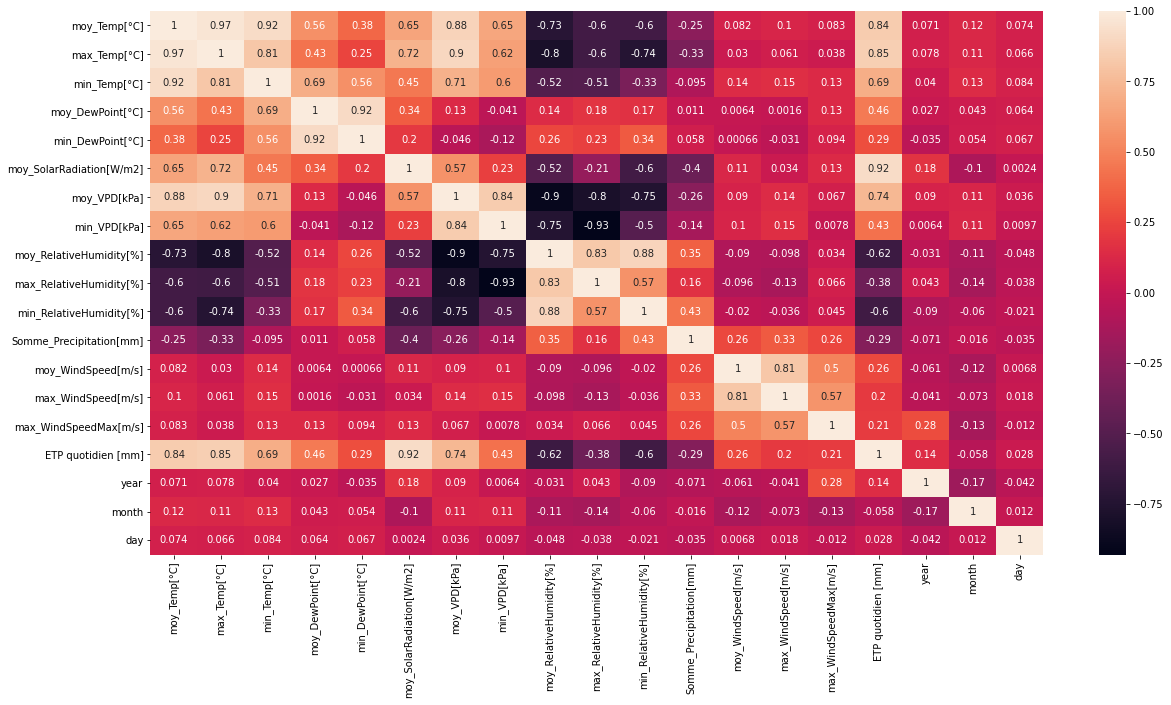

In [225]:
plt.figure(figsize=(20,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show

Correlation: It is measurement of effect of one feature upon other feature. Its value lies between -1,1. 1 or positive values for more correlated(light boxes) and -1 or negative values for not correlated(dark boxes) feature


### **Data Normalization**

In [226]:
X=data.drop(['ETP quotidien [mm]'],axis=1)
y=data['ETP quotidien [mm]']

In [227]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

# **Model Preparation**

In [166]:
from sklearn.model_selection import train_test_split

In [230]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [233]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.2598473067072852
--------------------------------------------------
Mean absolute error (MAE) :  0.2015286484804836
--------------------------------------------------
R2 score :  0.9768106741164889
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Ridge) : 0.012 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean

,Training Score,Testing Score,MAE,RMSE,R2 Score
0,0.965393,0.976811,0.201529,0.259847,0.976811
1,0.966581,0.976709,0.198960,0.260416,0.976709
2,0.966088,0.958026,0.258296,0.349593,0.958026
3,0.996685,0.984874,0.145684,0.209865,0.984874
4,1.000000,0.966927,0.215471,0.310323,0.966927
